In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:\\Users\\utsav\\Desktop\\makemytrip_com-travel_sample\\makemytrip_com-travel_sample.csv")


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
area                               14713 non-null object
city                               20000 non-null object
country                            19596 non-null object
crawl_date                         10726 non-null object
highlight_value                    17609 non-null object
hotel_overview                     16716 non-null object
hotel_star_rating                  20000 non-null object
image_urls                         8517 non-null object
in_your_room                       14715 non-null object
is_value_plus                      20000 non-null object
latitude                           19981 non-null float64
longitude                          19981 non-null float64
mmt_holidayiq_review_count         9328 non-null float64
mmt_location_rating                11541 non-null object
mmt_review_count                   9365 non-null float64
mmt_review_rating                  

In [7]:
df.columns


Index(['area', 'city', 'country', 'crawl_date', 'highlight_value',
       'hotel_overview', 'hotel_star_rating', 'image_urls', 'in_your_room',
       'is_value_plus', 'latitude', 'longitude', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'pageurl', 'property_address', 'property_id',
       'property_name', 'property_type', 'qts', 'query_time_stamp',
       'room_types', 'site_review_count', 'site_review_rating', 'sitename',
       'state', 'traveller_rating', 'uniq_id'],
      dtype='object')

In [8]:
df.shape


(20000, 33)

In [9]:
df.isnull().sum()

area                                5287
city                                   0
country                              404
crawl_date                          9274
highlight_value                     2391
hotel_overview                      3284
hotel_star_rating                      0
image_urls                         11483
in_your_room                        5285
is_value_plus                          0
latitude                              19
longitude                             19
mmt_holidayiq_review_count         10672
mmt_location_rating                 8459
mmt_review_count                   10635
mmt_review_rating                   8459
mmt_review_score                   10233
mmt_traveller_type_review_count     2044
mmt_tripadvisor_count               8844
pageurl                                0
property_address                       3
property_id                            0
property_name                          0
property_type                        109
qts             

In [10]:
to_be_dropped = ["country", "area","crawl_date" ]

new_df = df.drop(to_be_dropped , axis =1)

df.latitude.isnull().sum()
df.longitude.isnull().sum()

df.isnull().sum()


area                                5287
city                                   0
country                              404
crawl_date                          9274
highlight_value                     2391
hotel_overview                      3284
hotel_star_rating                      0
image_urls                         11483
in_your_room                        5285
is_value_plus                          0
latitude                              19
longitude                             19
mmt_holidayiq_review_count         10672
mmt_location_rating                 8459
mmt_review_count                   10635
mmt_review_rating                   8459
mmt_review_score                   10233
mmt_traveller_type_review_count     2044
mmt_tripadvisor_count               8844
pageurl                                0
property_address                       3
property_id                            0
property_name                          0
property_type                        109
qts             

In [11]:

new_df[new_df.index == 2]["hotel_overview"].values[0]
new_df["hotel_overview"] = new_df["hotel_overview"].str.replace('less', ' ').str.replace('|', ' ')
new_df["hotel_overview"].astype("str")
new_df["hotel_overview"].dtype


cities = ['Hyderabad','Kolkata','Guwahati','Mumbai','NewDelhiAndNCR','Bangalore','Vijaywada','Chennai',"Udaipur","Jaipur","Pune", "Ladakh", "Pushkar","Ajmer","Kasol"]

newdf = df.loc[df['city'].isin(cities)]


In [12]:

to_be_dropped = ["country", "area","crawl_date" ,"image_urls","pageurl","state", "qts", "sitename" , "site_review_rating","site_review_count","query_time_stamp","longitude", "latitude"]
""" makes sense to drop these site review count  and review rating as 3200 out of 3600 are missing"""
newdf_1 = newdf.drop(to_be_dropped, axis =1)
newdf_1.isnull().sum()
newd = newdf.drop(to_be_dropped, axis =1)
s =newd["mmt_location_rating"].value_counts()


In [13]:
newdf_1.shape

(4732, 20)

In [14]:

""" Hotel Overview """
new_df[new_df["hotel_overview"].isnull()]
newdf_1["hotel_overview"] = newdf_1["hotel_overview"].replace(np.nan, "No overview ")
newdf_1["hotel_overview"].isnull().sum()


0

In [22]:
newdf_1["hotel_overview"] = newdf_1["hotel_overview"].str.replace("|less","")
newdf_1["hotel_overview"].dtype
newdf_1["hotel_overview"] = newdf_1["hotel_overview"].str.replace('|' ,' ' )


In [23]:
vec = CountVectorizer(stop_words = "english",ngram_range=(3, 3))
vec.fit(newdf_1["hotel_overview"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(3, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
bag_of_words  =vec.transform(newdf_1["hotel_overview"])
print(bag_of_words)


  (0, 3537)	1
  (0, 4970)	1
  (0, 6127)	1
  (0, 8934)	1
  (0, 10654)	1
  (0, 13566)	1
  (0, 15229)	1
  (0, 16152)	1
  (0, 16977)	1
  (0, 18869)	1
  (0, 23977)	1
  (0, 26638)	1
  (0, 31545)	1
  (0, 31724)	1
  (0, 32195)	1
  (0, 34141)	1
  (0, 34924)	1
  (0, 40158)	1
  (0, 42770)	1
  (0, 45465)	1
  (0, 47608)	1
  (0, 50736)	1
  (0, 51156)	1
  (0, 53874)	1
  (0, 56076)	1
  :	:
  (4730, 117856)	1
  (4730, 118022)	1
  (4730, 119208)	1
  (4730, 119652)	1
  (4730, 127237)	1
  (4730, 129197)	1
  (4730, 130788)	1
  (4730, 133182)	1
  (4730, 134017)	1
  (4730, 136861)	1
  (4730, 136979)	1
  (4730, 141586)	1
  (4730, 146269)	1
  (4730, 153516)	1
  (4730, 154147)	1
  (4730, 154753)	1
  (4730, 157326)	1
  (4730, 160673)	1
  (4730, 161826)	1
  (4730, 162644)	1
  (4730, 162921)	1
  (4730, 162927)	1
  (4730, 162939)	1
  (4730, 163587)	1
  (4730, 165157)	1


In [25]:
sum_of_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq)


In [26]:
df1 = pd.DataFrame(words_freq, columns = ['desc' , 'count'])
print(df1)


                    desc  count
0               00 00 pm      4
1               00 10 00      3
2             00 10 00am      1
3               00 10 30      2
4               00 11 00      7
...                  ...    ...
168067        šã ãƒæ ãƒâ   1847
168068        šã ãƒæ ãƒæ    552
168069    žâ help guests      1
168070  žâ multi cuisine      2
168071        žâ ãƒæ ãƒâ    294

[168072 rows x 2 columns]


In [27]:

df1['word_count'] = df1['desc'].apply(lambda x: len(str(x).split()))
desc_lengths = list(df1['word_count'])
print("Number of descriptions:",len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))


Number of descriptions: 168072 
Average word count 3.0 
Minimum word count 3 
Maximum word count 3


In [28]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


In [29]:

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text


In [30]:
df1['desc_clean'] = df1['desc'].apply(clean_text)


In [31]:
df1['desc_clean'][0]


'00 00 pm'

<BarContainer object of 20 artists>

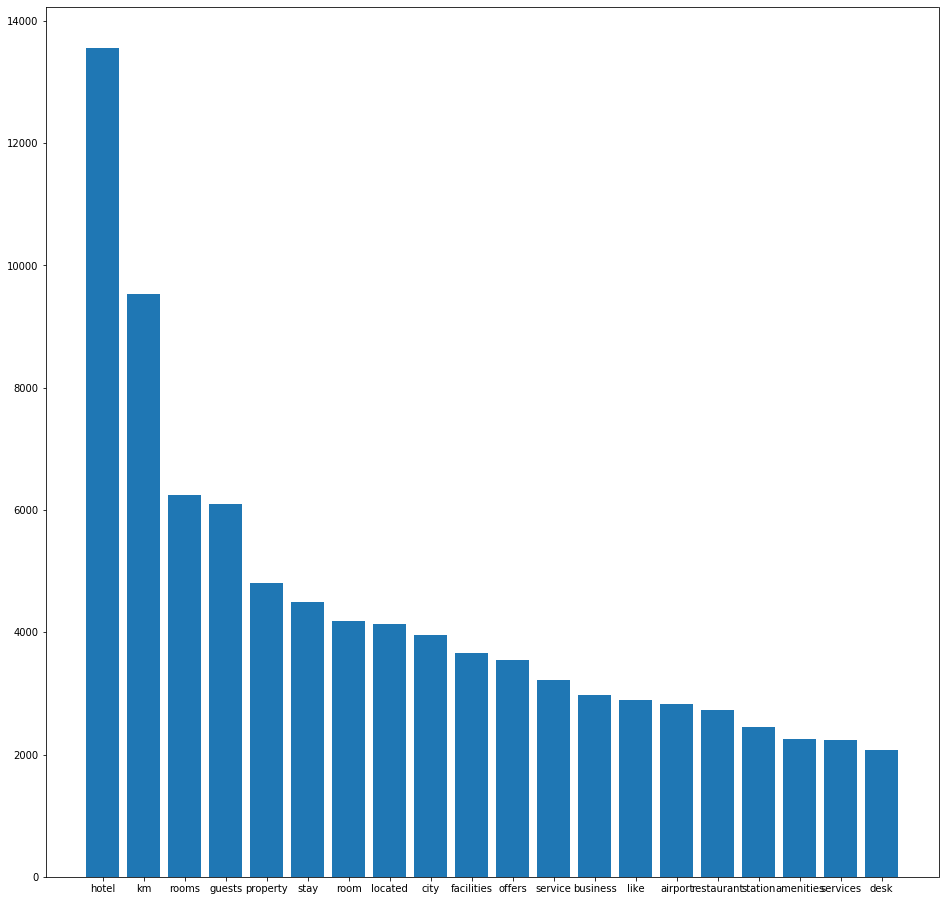

In [32]:
word_freq_clean = df1.desc_clean.str.split(expand=True).stack().value_counts()
word_freq_clean[:20]
plt.figure(figsize=(16,16))
plt.bar(range(len(word_freq_clean[:20])), dict(word_freq_clean[:20]).values(), tick_label=list(dict(word_freq_clean[:20]).keys()))


In [33]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df1['desc_clean'])


In [ ]:
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [40]:
def recommendations(name, cosine_similarities = cosine_similarities):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    #idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
        
    return recommended_hotels

NameError: name 'cosine_similarities' is not defined

In [19]:
""" Highlight Value """
newdf_1["highlight_value"].value_counts()
newdf_1["highlight_value"] = newdf_1["highlight_value"].replace("{{facility}}", "No speacial Facilities")
newdf_1[newdf_1["highlight_value"].isnull()]["highlight_value"]
newdf_1["highlight_value"] = newdf_1["highlight_value"].replace(np.nan , "No speacial Facilities")



In [16]:
newdf_1.columns

Index(['city', 'highlight_value', 'hotel_overview', 'hotel_star_rating',
       'in_your_room', 'is_value_plus', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'property_address', 'property_id',
       'property_name', 'property_type', 'room_types', 'traveller_rating',
       'uniq_id'],
      dtype='object')

In [14]:
newdf_1["highlight_value"].isnull().sum()

0

In [15]:
""" Hotel Star Rating """
newdf_1["hotel_star_rating"] = newdf_1["hotel_star_rating"].str.replace("star" , "")
newdf_1["hotel_star_rating"] = newdf_1["hotel_star_rating"].str.replace("Four","4").str.replace('Five', '5').str.replace('5 on 5', '5').str.replace('4 on 5', '4')
newdf_1["hotel_star_rating"] = newdf_1["hotel_star_rating"].astype('str')
newdf_1["hotel_star_rating"] = newdf_1["hotel_star_rating"].map(lambda x : x.strip())



In [16]:
newdf_1["hotel_star_rating"] = newdf_1["hotel_star_rating"].astype('str')

In [17]:
newdf_1["hotel_star_rating"] = newdf_1["hotel_star_rating"].astype('int')

In [18]:
newdf_1["hotel_star_rating"].value_counts()


1    2123
3    1275
2     830
4     288
5     213
0       3
Name: hotel_star_rating, dtype: int64

In [19]:
newdf_1["hotel_star_rating"].isnull().sum()

0

In [20]:

newdf_1["is_value_plus"].value_counts()

no     4437
yes     295
Name: is_value_plus, dtype: int64

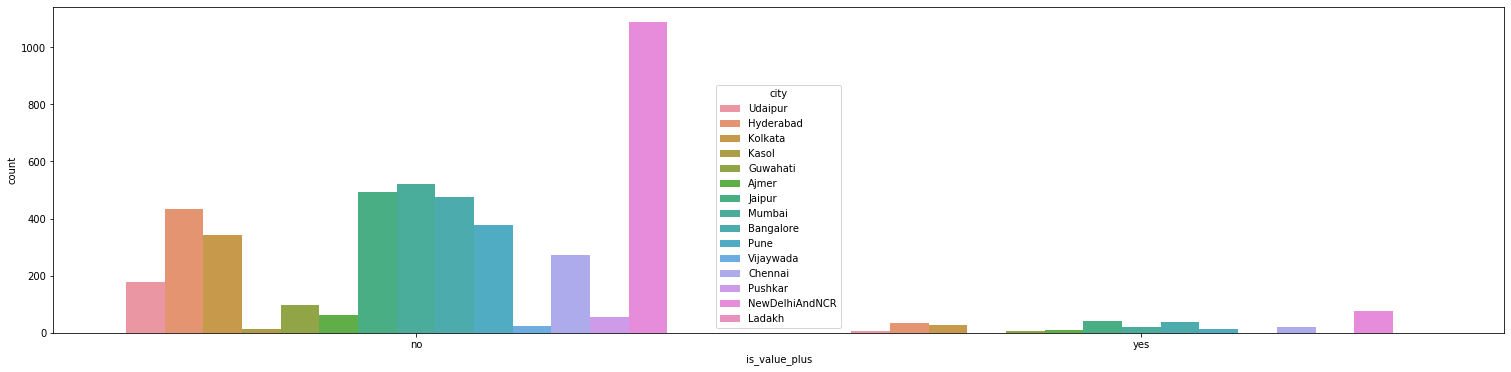

In [21]:

plt.figure(figsize=(26, 6))
sns.countplot(x = "is_value_plus", data  = newdf_1, hue =  'city')


In [22]:
#new_list =newdf_1['city'].unique()
#len(new_list)
#for x,y in enumerate(new_list):
 #   plt.subplot(5,3,x+1)
#    graph(y)

In [23]:
plot = pd.crosstab(index=newdf['city'],columns=newdf['hotel_star_rating'])
plot

hotel_star_rating,0,1,1 star,2,2 star,3,3 star,4,4 star,5,5 star,Five on 5,Four on 5,Four star
city,,,,,,,,,,,,,,
Ajmer,1,7,25,3,12,7,13,0,4,0,0,0,1,0
Bangalore,0,43,154,21,54,51,123,12,26,8,20,0,0,0
Chennai,0,71,71,30,31,20,23,16,12,9,9,0,0,0
Guwahati,0,10,38,3,10,9,30,0,5,0,1,0,0,0
Hyderabad,0,115,119,38,46,42,61,9,9,14,15,0,0,0
Jaipur,1,68,184,18,58,43,105,10,20,11,15,1,0,0
Kasol,0,6,7,0,0,1,0,0,0,0,0,0,0,0
Kolkata,0,28,184,11,55,14,56,0,10,1,9,0,0,1
Ladakh,0,0,1,0,0,0,0,0,0,0,0,0,0,0


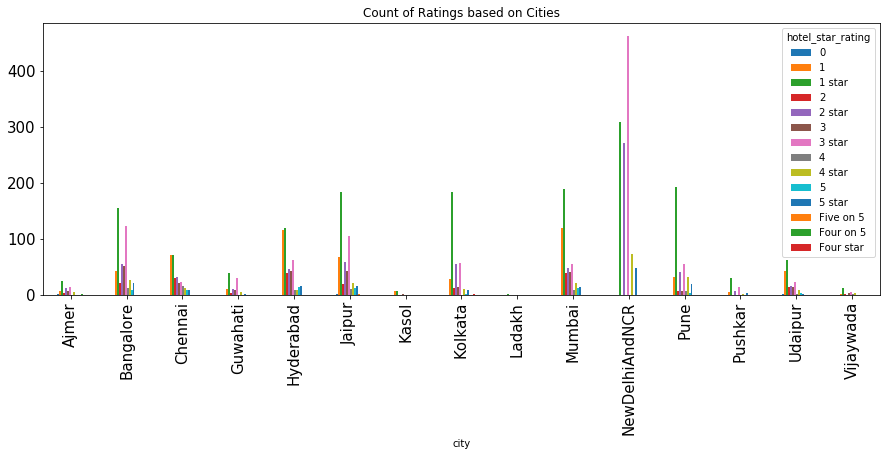

In [24]:

bar = plot.plot(kind='bar',figsize=(15,5),title='Count of Ratings based on Cities',fontsize=15)

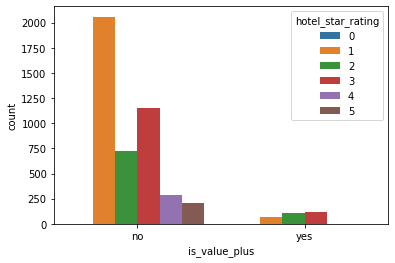

In [25]:
sns.countplot(x = "is_value_plus", data  = newdf_1, hue =  'hotel_star_rating')


In [26]:
""" Location Rating """
newdf_1["mmt_location_rating"].value_counts()
newdf_1["mmt_location_rating"].dtype

dtype('O')

In [27]:

newdf_1["mmt_location_rating"]  = newdf_1["mmt_location_rating"].str.replace('Location:', '').str.replace(':', '')
newdf_1["mmt_location_rating"].isnull().sum()

1589

In [28]:
newdf_1["mmt_location_rating"] = newdf_1["mmt_location_rating"].str.replace('..', '0')
newdf_1["mmt_location_rating"] = newdf_1["mmt_location_rating"].astype('float64')
newdf_1["mmt_location_rating"].fillna(newdf_1["mmt_location_rating"].mean(), inplace = True)


In [29]:
newdf_1["mmt_location_rating"].isnull().sum()

0

In [30]:
newdf_1["mmt_location_rating"].value_counts()

0.000000    1674
2.267261    1589
5.000000     283
4.000000     262
3.000000     164
2.000000     158
7.000000     149
6.000000     130
8.000000     123
9.000000     106
1.000000      94
Name: mmt_location_rating, dtype: int64

In [31]:
""" Room Types """
newdf_1["room_types"].value_counts()



Deluxe                                                                                                                                                            278
Deluxe Room                                                                                                                                                       184
Standard Room                                                                                                                                                     112
`standard Room                                                                                                                                                     77
`standard                                                                                                                                                          68
                                                                                                                                                                 ... 
Delu

In [32]:
newdf_1["room_types"] = newdf_1["room_types"].str.replace('`standard Room', 'Standard Room').str.replace('`standard', 'Standard Room').str.replace('standard','Standard Room').str.replace('Standard Room 1','Standard Room')



In [33]:
newdf_1["room_types"] = newdf_1["room_types"].replace(np.nan , 'Room Type Not Mentioned')


In [34]:
newdf_1["room_types"].isnull().sum()

0

In [35]:
""" In the room """
newdf_1["in_your_room"].value_counts()
newdf_1["in_your_room"] = newdf_1["in_your_room"].str.replace('{{value}}', 'The room has all the usual things, does not have anything special').str.replace('|','The room has all the usual things, does not have anything special')


In [36]:
newdf_1["in_your_room"].isnull().sum()


928

In [37]:
newdf_1["in_your_room"] = newdf_1["in_your_room"].replace(np.nan, 'The room has all the usual things, does not have anything speacial')


In [38]:
newdf_1["in_your_room"].isnull().sum()

0

In [39]:
""" mmt review score"""
newdf_1["mmt_review_score"].value_counts()



4.2    160
4.4    156
4.3    152
4.0    150
3.8    147
3.9    144
0.0    140
4.1    124
3.7    124
3.6    106
3.4    102
4.5     97
3.5     87
3.3     84
4.6     81
5.0     61
3.2     59
4.8     58
3.0     56
4.7     55
3.1     51
2.9     35
2.6     34
2.7     31
2.8     30
2.3     26
1.9     25
4.9     22
2.1     16
2.5     15
2.4     15
2.2     13
2.0     10
1.6      9
1.0      9
1.7      4
1.3      4
1.5      3
1.8      2
1.4      2
Name: mmt_review_score, dtype: int64

In [40]:
newdf_1["mmt_review_score"].isnull().sum()


2233

In [41]:
newdf_1["mmt_review_score"].dtype


dtype('float64')

In [42]:
mode = newdf_1["mmt_review_score"].mode()
list(mode)

[4.2]

In [43]:
newdf_1["mmt_review_score"].replace(np.nan, 4.2, inplace = True)


In [44]:
newdf_1["mmt_review_score"].isnull().sum()


0

### Trip Advisor Count

In [45]:
newdf_1["mmt_tripadvisor_count"].value_counts()

1.0      171
2.0      147
4.0       90
3.0       72
5.0       70
        ... 
484.0      1
252.0      1
228.0      1
232.0      1
397.0      1
Name: mmt_tripadvisor_count, Length: 450, dtype: int64

In [46]:
newdf_1["mmt_tripadvisor_count"].dtype

dtype('float64')

In [47]:
newdf_1["mmt_tripadvisor_count"].isnull().sum()

2020

In [48]:
mode_ = newdf_1["mmt_tripadvisor_count"].mode()
mode_

0    1.0
dtype: float64

In [49]:
newdf_1["mmt_tripadvisor_count"].fillna(1.0 , inplace = True)

In [50]:
newdf_1["mmt_tripadvisor_count"].isnull().sum()

0

In [51]:
newdf_1.isnull().sum()

city                                  0
highlight_value                       0
hotel_overview                        0
hotel_star_rating                     0
in_your_room                          0
is_value_plus                         0
mmt_holidayiq_review_count         2667
mmt_location_rating                   0
mmt_review_count                   2679
mmt_review_rating                  1589
mmt_review_score                      0
mmt_traveller_type_review_count     357
mmt_tripadvisor_count                 0
property_address                      0
property_id                           0
property_name                         0
property_type                        44
room_types                            0
traveller_rating                   3122
uniq_id                               0
dtype: int64

In [52]:
newdf_1["mmt_holidayiq_review_count"].value_counts()

0.0      1059
1.0       108
2.0        74
3.0        70
4.0        67
         ... 
69.0        1
123.0       1
261.0       1
255.0       1
221.0       1
Name: mmt_holidayiq_review_count, Length: 128, dtype: int64

### mmt_holidayiq_review_count

In [53]:
newdf_1["mmt_holidayiq_review_count"].isnull().sum()

2667

In [54]:
newdf_1["mmt_holidayiq_review_count"].dtype

dtype('float64')

In [55]:
mode__ = newdf_1["mmt_holidayiq_review_count"].mode()
mode__

0    0.0
dtype: float64

In [56]:
newdf_1["mmt_holidayiq_review_count"].fillna(0 ,inplace = True)

In [57]:
newdf_1["mmt_holidayiq_review_count"].isnull().sum()

0

In [58]:
newdf_1.isnull().sum()

city                                  0
highlight_value                       0
hotel_overview                        0
hotel_star_rating                     0
in_your_room                          0
is_value_plus                         0
mmt_holidayiq_review_count            0
mmt_location_rating                   0
mmt_review_count                   2679
mmt_review_rating                  1589
mmt_review_score                      0
mmt_traveller_type_review_count     357
mmt_tripadvisor_count                 0
property_address                      0
property_id                           0
property_name                         0
property_type                        44
room_types                            0
traveller_rating                   3122
uniq_id                               0
dtype: int64

In [59]:
newdf_1["mmt_review_count"].value_counts()

0.0      456
1.0      192
2.0       98
4.0       69
5.0       66
        ... 
233.0      1
175.0      1
271.0      1
473.0      1
209.0      1
Name: mmt_review_count, Length: 207, dtype: int64

In [60]:
newdf_1["mmt_review_count"].dtype

dtype('float64')

In [61]:
newdf_1["mmt_review_count"].isnull().sum()

2679

In [62]:
_mode_ = newdf_1["mmt_review_count"].mode()

In [63]:
_mode_ 

0    0.0
dtype: float64

In [64]:
newdf_1["mmt_review_count"].fillna(0.0, inplace = True)

In [65]:
newdf_1["mmt_review_count"].isnull().sum()

0

In [66]:
newdf_1.isnull().sum()

city                                  0
highlight_value                       0
hotel_overview                        0
hotel_star_rating                     0
in_your_room                          0
is_value_plus                         0
mmt_holidayiq_review_count            0
mmt_location_rating                   0
mmt_review_count                      0
mmt_review_rating                  1589
mmt_review_score                      0
mmt_traveller_type_review_count     357
mmt_tripadvisor_count                 0
property_address                      0
property_id                           0
property_name                         0
property_type                        44
room_types                            0
traveller_rating                   3122
uniq_id                               0
dtype: int64

In [67]:
newdf_1["mmt_review_rating"]

0          {{ratingCriteria.name}}{{ratingCriteria.value}}
1          {{ratingCriteria.name}}{{ratingCriteria.value}}
2          {{ratingCriteria.name}}{{ratingCriteria.value}}
3                                                      NaN
4          {{ratingCriteria.name}}{{ratingCriteria.value}}
                               ...                        
19962    Excellent:1|Very Good:0|Average:1|Poor:0|Terri...
19963    Excellent:1|Very Good:0|Average:0|Poor:3|Terri...
19965    Excellent:0|Very Good:0|Average:1|Poor:0|Terri...
19977                                                  NaN
19988                                                  NaN
Name: mmt_review_rating, Length: 4732, dtype: object

In [68]:
newdf_1["mmt_traveller_type_review_count"].value_counts()

Families:{{ratingSummaryInfo.miscMap['family']}}|Couples:{{ratingSummaryInfo.miscMap['couple']}}|Business:{{ratingSummaryInfo.miscMap['business']}}|Solo:{{ratingSummaryInfo.miscMap['solo']}}|Friends:{{ratingSummaryInfo.miscMap['friends']}}    1546
Families:|Couples:|Business:|Solo:|Friends:                                                                                                                                                                                                         776
Families:0|Couples:0|Business:0|Solo:0|Friends:0                                                                                                                                                                                                    408
Family:0|Couple:0|Solo:0|Friends:0|Business:0                                                                                                                                                                                                       164
Families

In [69]:
newdf_1["mmt_traveller_type_review_count"].isnull().sum()

357

In [70]:
newdf_1["mmt_traveller_type_review_count"].dtype

dtype('O')

In [71]:
newdf_1["mmt_traveller_type_review_count"] = newdf_1["mmt_traveller_type_review_count"].replace("Families:{{ratingSummaryInfo.miscMap['family']}}|Couples:{{ratingSummaryInfo.miscMap['couple']}}|Business:{{ratingSummaryInfo.miscMap['business']}}|Solo:{{ratingSummaryInfo.miscMap['solo']}}|Friends:{{ratingSummaryInfo.miscMap['friends']}}","Family:0|Couple:0|Solo:0|Friends:0|Business:0")

In [72]:
newdf_1["mmt_traveller_type_review_count"].value_counts()

Family:0|Couple:0|Solo:0|Friends:0|Business:0        1710
Families:|Couples:|Business:|Solo:|Friends:           776
Families:0|Couples:0|Business:0|Solo:0|Friends:0      408
Families:1|Couples:0|Business:0|Solo:0|Friends:0       50
Families:0|Couples:1|Business:0|Solo:0|Friends:0       39
                                                     ... 
Family:2|Couple:0|Solo:0|Friends:1|Business:0           1
Families:8|Couples:3|Business:0|Solo:0|Friends:0        1
Families:7|Couples:7|Business:4|Solo:3|Friends:0        1
Families:14|Couples:8|Business:5|Solo:8|Friends:1       1
Family:80|Couple:58|Solo:14|Friends:13|Business:0       1
Name: mmt_traveller_type_review_count, Length: 1039, dtype: int64

In [73]:
newdf_1["mmt_traveller_type_review_count"].fillna('Family:0|Couple:0|Solo:0|Friends:0|Business:0', inplace = True)

In [74]:
newdf_1["mmt_traveller_type_review_count"].value_counts()

Family:0|Couple:0|Solo:0|Friends:0|Business:0        2067
Families:|Couples:|Business:|Solo:|Friends:           776
Families:0|Couples:0|Business:0|Solo:0|Friends:0      408
Families:1|Couples:0|Business:0|Solo:0|Friends:0       50
Families:0|Couples:1|Business:0|Solo:0|Friends:0       39
                                                     ... 
Family:2|Couple:0|Solo:0|Friends:1|Business:0           1
Families:8|Couples:3|Business:0|Solo:0|Friends:0        1
Families:7|Couples:7|Business:4|Solo:3|Friends:0        1
Families:14|Couples:8|Business:5|Solo:8|Friends:1       1
Family:80|Couple:58|Solo:14|Friends:13|Business:0       1
Name: mmt_traveller_type_review_count, Length: 1039, dtype: int64

In [75]:
newdf_1["mmt_traveller_type_review_count"].replace('Families:|Couples:|Business:|Solo:|Friends:','Family:0|Couple:0|Solo:0|Friends:0|Business:0', inplace = True)

In [76]:
newdf_1["mmt_traveller_type_review_count"].value_counts()

Family:0|Couple:0|Solo:0|Friends:0|Business:0        2843
Families:0|Couples:0|Business:0|Solo:0|Friends:0      408
Families:1|Couples:0|Business:0|Solo:0|Friends:0       50
Families:0|Couples:1|Business:0|Solo:0|Friends:0       39
Family:0|Couple:0|Solo:1|Friends:0|Business:0          28
                                                     ... 
Families:12|Couples:5|Business:6|Solo:7|Friends:0       1
Family:2|Couple:0|Solo:0|Friends:1|Business:0           1
Families:8|Couples:3|Business:0|Solo:0|Friends:0        1
Families:7|Couples:7|Business:4|Solo:3|Friends:0        1
Family:80|Couple:58|Solo:14|Friends:13|Business:0       1
Name: mmt_traveller_type_review_count, Length: 1038, dtype: int64

In [77]:
new__ = []
for  a in  newdf_1["mmt_traveller_type_review_count"]:
    new_ = a.split("|" )
    new__.append(new_)

In [78]:
newappdf = pd.DataFrame(columns =["Families_travelling_review_count","Couples_travelling_review_count", "Solos_travelling_review_count", "Friends_travelling_review_count", "Business"])
for b, c, d, e, f in new__:
    newappdf.loc[len(newappdf)] = [b.split(':')[1],c.split(':')[1],d.split(':')[1],e.split(':')[1],f.split(':')[1]]
newappdf

,Families_travelling_review_count,Couples_travelling_review_count,Solos_travelling_review_count,Friends_travelling_review_count,Business
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4727,0,1,1,0,0
4728,0,1,0,2,0
4729,0,0,0,1,0
4730,0,0,0,0,0


In [79]:
newdf_1.isnull().sum()

city                                  0
highlight_value                       0
hotel_overview                        0
hotel_star_rating                     0
in_your_room                          0
is_value_plus                         0
mmt_holidayiq_review_count            0
mmt_location_rating                   0
mmt_review_count                      0
mmt_review_rating                  1589
mmt_review_score                      0
mmt_traveller_type_review_count       0
mmt_tripadvisor_count                 0
property_address                      0
property_id                           0
property_name                         0
property_type                        44
room_types                            0
traveller_rating                   3122
uniq_id                               0
dtype: int64

In [80]:
import re 
list1 = [["Eden:1", "Hazard"],
         ["John:2", "Terry"]]
for a , b in list1:
    print("The fisrt name ",a.split(':')[1],"secodn name is", b)

The fisrt name  1 secodn name is Hazard
The fisrt name  2 secodn name is Terry


In [81]:
new__

[['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Friends:0', 'Business:0'],
 ['Family:0', 'Couple:0', 'Solo:0', 'Fri

In [82]:
newdf_1["mmt_review_rating"].value_counts()

{{ratingCriteria.name}}{{ratingCriteria.value}}             1546
Excellent:1|Very Good:0|Average:0|Poor:0|Terrible:0           66
Excellent:0|Very Good:0|Average:1|Poor:0|Terrible:0           44
Excellent:0|Very Good:0|Average:0|Poor:1|Terrible:0           30
Excellent:0|Very Good:1|Average:0|Poor:0|Terrible:0           26
                                                            ... 
Excellent:24|Very Good:50|Average:64|Poor:24|Terrible:13       1
Excellent:7|Very Good:1|Average:1|Poor:2|Terrible:1            1
Excellent:8|Very Good:5|Average:5|Poor:6|Terrible:0            1
Excellent:13|Very Good:8|Average:18|Poor:18|Terrible:9         1
Excellent:35|Very Good:14|Average:11|Poor:4|Terrible:3         1
Name: mmt_review_rating, Length: 1164, dtype: int64

In [83]:
newdf_1["mmt_review_rating"].isnull().sum()
newdf_1["mmt_review_rating"]

0          {{ratingCriteria.name}}{{ratingCriteria.value}}
1          {{ratingCriteria.name}}{{ratingCriteria.value}}
2          {{ratingCriteria.name}}{{ratingCriteria.value}}
3                                                      NaN
4          {{ratingCriteria.name}}{{ratingCriteria.value}}
                               ...                        
19962    Excellent:1|Very Good:0|Average:1|Poor:0|Terri...
19963    Excellent:1|Very Good:0|Average:0|Poor:3|Terri...
19965    Excellent:0|Very Good:0|Average:1|Poor:0|Terri...
19977                                                  NaN
19988                                                  NaN
Name: mmt_review_rating, Length: 4732, dtype: object

In [84]:
newdf_1["mmt_review_rating"].replace(np.nan ,'Excellent:0|Very Good:0|Average:0|Poor:0|Terrible:0', inplace = True)

In [85]:
newdf_1["mmt_review_rating"].value_counts()

Excellent:0|Very Good:0|Average:0|Poor:0|Terrible:0         1589
{{ratingCriteria.name}}{{ratingCriteria.value}}             1546
Excellent:1|Very Good:0|Average:0|Poor:0|Terrible:0           66
Excellent:0|Very Good:0|Average:1|Poor:0|Terrible:0           44
Excellent:0|Very Good:0|Average:0|Poor:1|Terrible:0           30
                                                            ... 
Excellent:24|Very Good:50|Average:64|Poor:24|Terrible:13       1
Excellent:7|Very Good:1|Average:1|Poor:2|Terrible:1            1
Excellent:8|Very Good:5|Average:5|Poor:6|Terrible:0            1
Excellent:13|Very Good:8|Average:18|Poor:18|Terrible:9         1
Excellent:35|Very Good:14|Average:11|Poor:4|Terrible:3         1
Name: mmt_review_rating, Length: 1165, dtype: int64

In [86]:
newdf_1["mmt_review_rating"].replace('{{ratingCriteria.name}}{{ratingCriteria.value}}','Excellent:0|Very Good:0|Average:0|Poor:0|Terrible:0', inplace = True)

In [87]:
newdf_1["mmt_review_rating"].isnull().sum()

0

### traveller rating

In [88]:
newdf_1["traveller_rating"].value_counts()

Location:5/5 | Hospitality:5/5 | Facilities:5/5 | Cleanliness:5/5 | Value for Money:5/5 | Food:5/5                24
0.0                                                                                                               13
Location:2/5 | Hospitality:2/5 | Facilities:2/5 | Cleanliness:2/5 | Value for Money:2/5 | Food:2/5                 9
Location:5.0/5 | Hospitality:5.0/5 | Facilities:5.0/5 | Cleanliness:5.0/5 | Value for Money:5.0/5 | Food:5.0/5     8
Location:5/5 | Hospitality:5/5 | Facilities:5/5 | Cleanliness:5/5 | Value for Money:5/5 | Food:4/5                 6
                                                                                                                  ..
Location:4.8/5 | Hospitality:4.8/5 | Facilities:4.6/5 | Cleanliness:5/5 | Value for Money:4.8/5 | Food:4.8/5       1
Location:4.7/5 | Hospitality:3.7/5 | Facilities:3.9/5 | Cleanliness:3.3/5 | Value for Money:3.7/5 | Food:1.4/5     1
Location:4.1/5 | Hospitality:4/5 | Facilities:3.8/5 | Cleanlines

In [89]:
newdf_1["traveller_rating"].isnull().sum()
newdf_1["traveller_rating"].dtype

dtype('O')

In [90]:
for a in newdf_1["traveller_rating"]:
    if a == np.nan:
        continue
    print(a)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Location:5.0/5 | Hospitality:5.0/5 | Facilities:5.0/5 | Cleanliness:5.0/5 | Value for Money:5.0/5 | Food:5.0/5
Location:4.1/5 | Hospitality:3.9/5 | Facilities:3.5/5 | Cleanliness:3.7/5 | Value for Money:3.5/5 | Food:2.9/5
Location:3.0/5 | Hospitality:2.7/5 | Facilities:2.3/5 | Cleanliness:2.7/5 | Value for Money:2.7/5 | Food:2.7/5
nan
Location:4.6/5 | Hospitality:4.0/5 | Facilities:4.2/5 | Cleanliness:3.7/5 | Value for Money:4.0/5 | Food:2.8/5
Location:3.7/5 | Hospitality:3.9/5 | Facilities:3.4/5 | Cleanliness:3.5/5 | Value for Money:3.9/5 | Food:3.2/5
Location:4.8/5 | Hospitality:4.5/5 | Facilities:4/5 | Cleanliness:4.2/5 | Value for Money:4.5/5 | Food:4.2/5
nan
nan
Location:4.2/5 | Hospitality:4.3/5 | Facilities:3.9/5 | Cleanliness:4/5 | Value for Money:4.2/5 | Food:3.6/5
Location:3/5 | Hospitality:3/5 | Facilities:3/5 | Cleanliness:3.8/5 | Value for Money:3/5 | Food:3.5/5
nan
Loca

nan
Location:4.2/5 | Hospitality:4.4/5 | Facilities:4.1/5 | Cleanliness:4.5/5 | Value for Money:4.4/5 | Food:4.1/5
nan
Location:4/5 | Hospitality:4/5 | Facilities:4/5 | Cleanliness:4/5 | Value for Money:4/5 | Food:4/5
nan
nan
Location:3.8/5 | Hospitality:3.8/5 | Facilities:3/5 | Cleanliness:3/5 | Value for Money:3.8/5 | Food:3.2/5
Location:3.5/5 | Hospitality:3.8/5 | Facilities:3.4/5 | Cleanliness:3.3/5 | Value for Money:3.7/5 | Food:3/5
nan
Location:4.1/5 | Hospitality:4.4/5 | Facilities:4.3/5 | Cleanliness:4.7/5 | Value for Money:4.4/5 | Food:2.9/5
Location:4.6/5 | Hospitality:4/5 | Facilities:3.9/5 | Cleanliness:3.9/5 | Value for Money:4.1/5 | Food:3.8/5
Location:5/5 | Hospitality:4/5 | Facilities:4/5 | Cleanliness:4.5/5 | Value for Money:4/5 | Food:4/5
Location:4.2/5 | Hospitality:3.9/5 | Facilities:3.9/5 | Cleanliness:4.2/5 | Value for Money:3.9/5 | Food:4/5
Location:4.8/5 | Hospitality:4.6/5 | Facilities:4.3/5 | Cleanliness:4.5/5 | Value for Money:4.6/5 | Food:4/5
nan
Location:4.

nan
Location:4/5 | Hospitality:3.3/5 | Facilities:2/5 | Cleanliness:2.7/5 | Value for Money:3.3/5 | Food:2.3/5
nan
Location:4/5 | Hospitality:0/5 | Facilities:5/5 | Cleanliness:5/5 | Value for Money:5/5 | Food:0/5
nan
nan
nan
Location:3.9/5 | Hospitality:4.3/5 | Facilities:3.7/5 | Cleanliness:3.7/5 | Value for Money:4.1/5 | Food:3.8/5
Location:3/5 | Hospitality:4/5 | Facilities:3/5 | Cleanliness:4/5 | Value for Money:4/5 | Food:3/5
Location:5/5 | Hospitality:0/5 | Facilities:5/5 | Cleanliness:4/5 | Value for Money:5/5 | Food:0/5
Location:4/5 | Hospitality:3.6/5 | Facilities:3.7/5 | Cleanliness:3.8/5 | Value for Money:3.6/5 | Food:3.5/5
Location:3.9/5 | Hospitality:4.6/5 | Facilities:4.6/5 | Cleanliness:4.3/5 | Value for Money:4.4/5 | Food:4.3/5
nan
nan
nan
nan
Location:4.3/5 | Hospitality:3.3/5 | Facilities:3/5 | Cleanliness:3.3/5 | Value for Money:3.2/5 | Food:3.5/5
Location:4.5/5 | Hospitality:4.1/5 | Facilities:3.7/5 | Cleanliness:3.9/5 | Value for Money:4/5 | Food:3.4/5
Location:5/

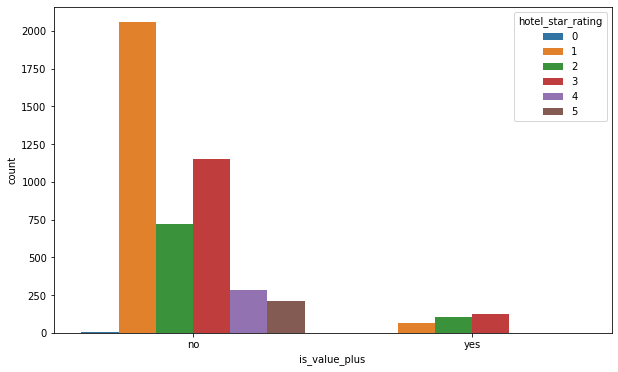

In [91]:

plt.figure(figsize=(10, 6))
sns.countplot(x = "is_value_plus", data  = newdf_1, hue =  'hotel_star_rating')


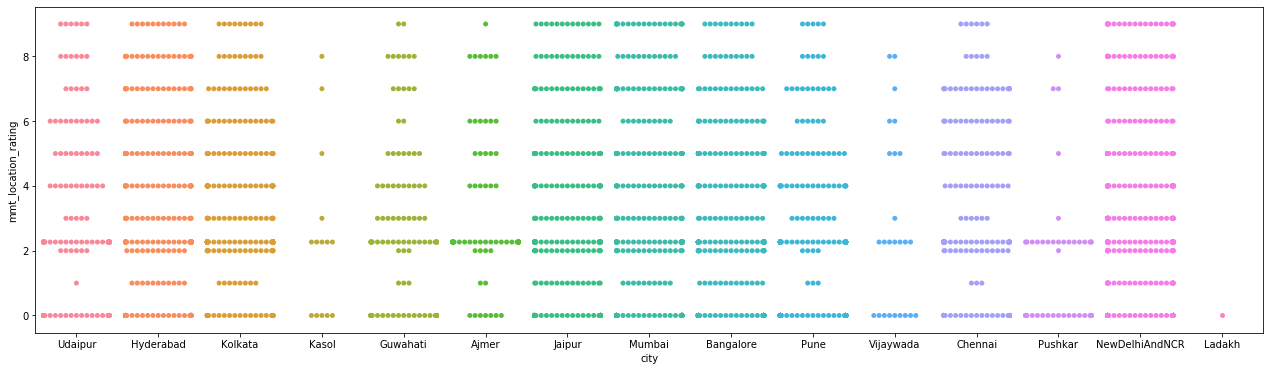

In [92]:

plt.figure(figsize=(22, 6))
sns.swarmplot(data = newdf_1, x = "city", y = 'mmt_location_rating')

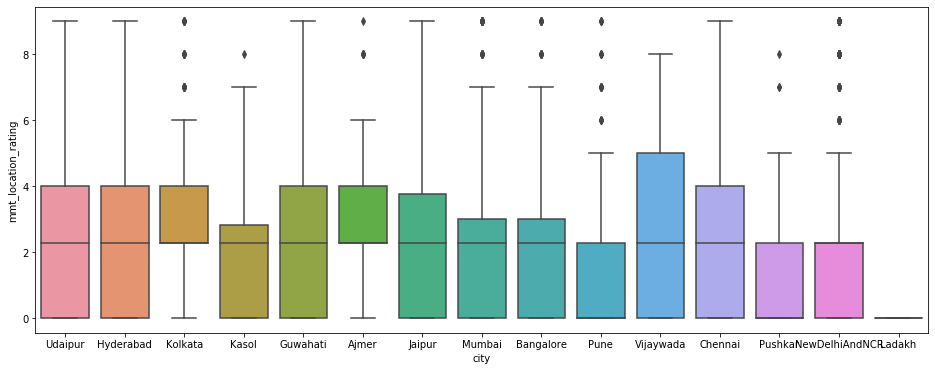

In [93]:
newdf_1.columns
plt.figure(figsize=(16, 6))
sns.boxplot(data = newdf_1, x = 'city', y  = 'mmt_location_rating')

In [94]:
#Location ratings in cities
avg_location_rating = newdf_1.groupby('city').mean()["mmt_location_rating"]
avg_location_rating

city
Ajmer             3.200293
Bangalore         2.137532
Chennai           2.539715
Guwahati          2.633462
Hyderabad         2.654627
Jaipur            2.393571
Kasol             2.452593
Kolkata           2.967769
Ladakh            0.000000
Mumbai            2.267088
NewDelhiAndNCR    1.933420
Pune              1.639630
Pushkar           1.259704
Udaipur           2.544422
Vijaywada         2.754833
Name: mmt_location_rating, dtype: float64

In [95]:
# average rating of Hotels in major cities" 
avg_rating = newdf_1.groupby("city").mean()["hotel_star_rating"]
avg_rating

city
Ajmer             1.945205
Bangalore         2.267578
Chennai           2.037671
Guwahati          2.037736
Hyderabad         1.982906
Jaipur            2.065543
Kasol             1.142857
Kolkata           1.756098
Ladakh            1.000000
Mumbai            1.858195
NewDelhiAndNCR    2.379192
Pune              1.936224
Pushkar           1.785714
Udaipur           1.788043
Vijaywada         2.040000
Name: hotel_star_rating, dtype: float64

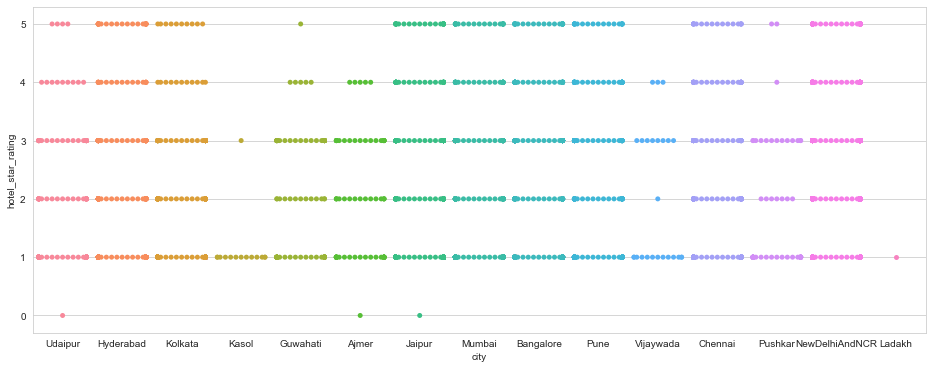

In [96]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.swarmplot(data = newdf_1 ,x = 'city' ,y = 'hotel_star_rating')


In [97]:
newdf_1.columns

Index(['city', 'highlight_value', 'hotel_overview', 'hotel_star_rating',
       'in_your_room', 'is_value_plus', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'property_address', 'property_id',
       'property_name', 'property_type', 'room_types', 'traveller_rating',
       'uniq_id'],
      dtype='object')

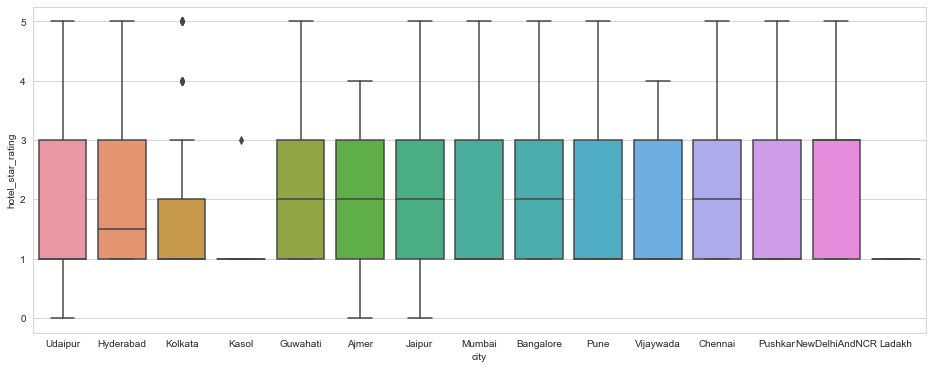

In [98]:
plt.figure(figsize=(16, 6))
sns.boxplot(data = newdf_1 ,x ='city', y = 'hotel_star_rating')

In [99]:
newdf_1['mmt_review_count'].dtype

dtype('float64')

In [100]:
# Review Count Per City
newdf_1.groupby('city').sum()['mmt_review_count']

city
Ajmer             1168.0
Bangalore         6778.0
Chennai           9194.0
Guwahati          1080.0
Hyderabad         7784.0
Jaipur            5825.0
Kasol               26.0
Kolkata           4785.0
Ladakh               0.0
Mumbai            8677.0
NewDelhiAndNCR    8597.0
Pune              4372.0
Pushkar            117.0
Udaipur           1488.0
Vijaywada          471.0
Name: mmt_review_count, dtype: float64

Text(0.5, 1.0, ' Review Count Per City')

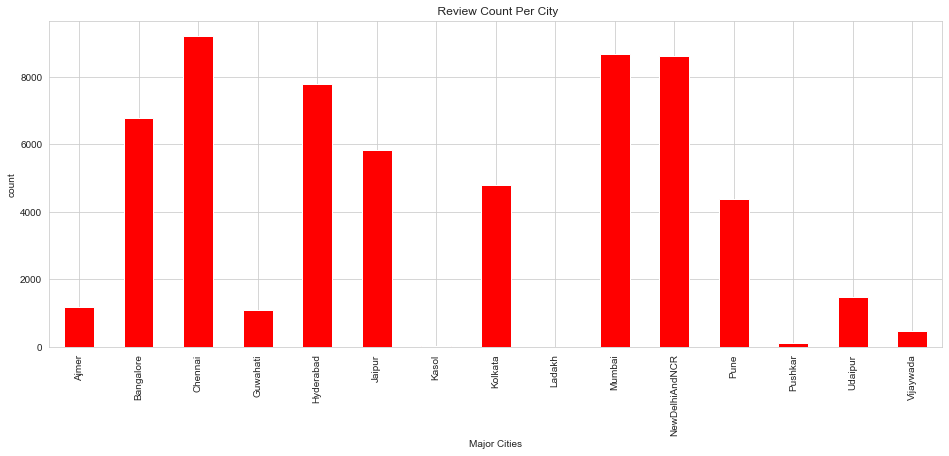

In [101]:
# Review Count Per City
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
newdf_1.groupby('city').sum()['mmt_review_count'].plot.bar(color ='red')
plt.ylabel('count')
plt.xlabel('Major Cities')
plt.title(' Review Count Per City')

In [102]:
newdf_1["mmt_review_score"].dtype

dtype('float64')

In [103]:
#Average MMT Score Per City
newdf_1.groupby("city").mean()["mmt_review_score"]

city
Ajmer             3.968493
Bangalore         3.899023
Chennai           3.852397
Guwahati          3.979245
Hyderabad         3.692735
Jaipur            3.828277
Kasol             3.264286
Kolkata           3.779675
Ladakh            4.200000
Mumbai            3.787661
NewDelhiAndNCR    4.005761
Pune              3.986735
Pushkar           3.900000
Udaipur           3.715217
Vijaywada         3.948000
Name: mmt_review_score, dtype: float64

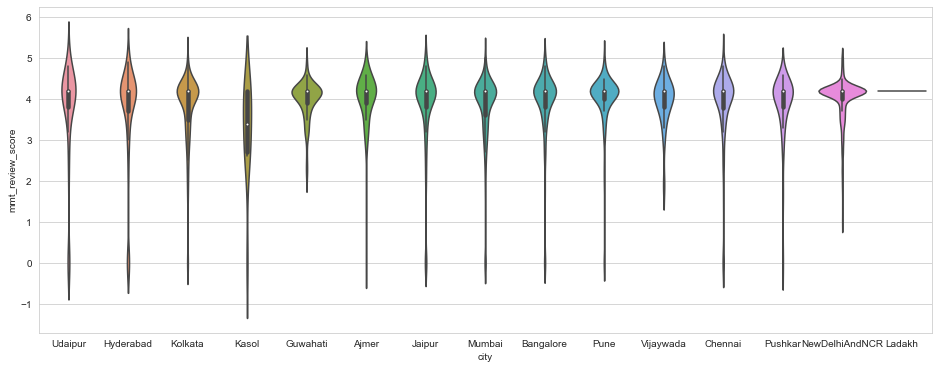

In [104]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.violinplot(x = "city" , y ="mmt_review_score" , data =newdf_1)

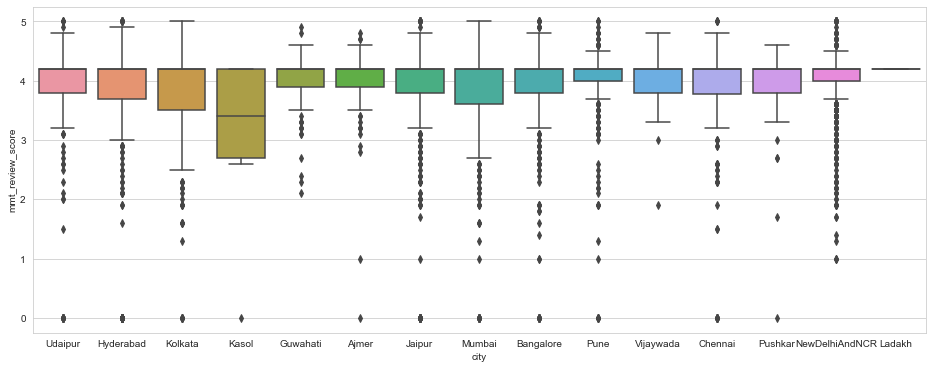

In [105]:
plt.figure(figsize=(16, 6))
sns.boxplot(x  = 'city', y ='mmt_review_score', data = newdf_1)

In [106]:
newdf_1.columns

Index(['city', 'highlight_value', 'hotel_overview', 'hotel_star_rating',
       'in_your_room', 'is_value_plus', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'property_address', 'property_id',
       'property_name', 'property_type', 'room_types', 'traveller_rating',
       'uniq_id'],
      dtype='object')

In [107]:
# Make My Trip  TripAdvisor Counts Per City
newdf_1.groupby('city').sum()["mmt_tripadvisor_count"]

city
Ajmer              2017.0
Bangalore         33052.0
Chennai           25100.0
Guwahati           3287.0
Hyderabad         27574.0
Jaipur            52055.0
Kasol               232.0
Kolkata           16271.0
Ladakh                1.0
Mumbai            54001.0
NewDelhiAndNCR    62246.0
Pune              19505.0
Pushkar            3040.0
Udaipur           18814.0
Vijaywada          1612.0
Name: mmt_tripadvisor_count, dtype: float64

Text(0, 0.5, 'count')

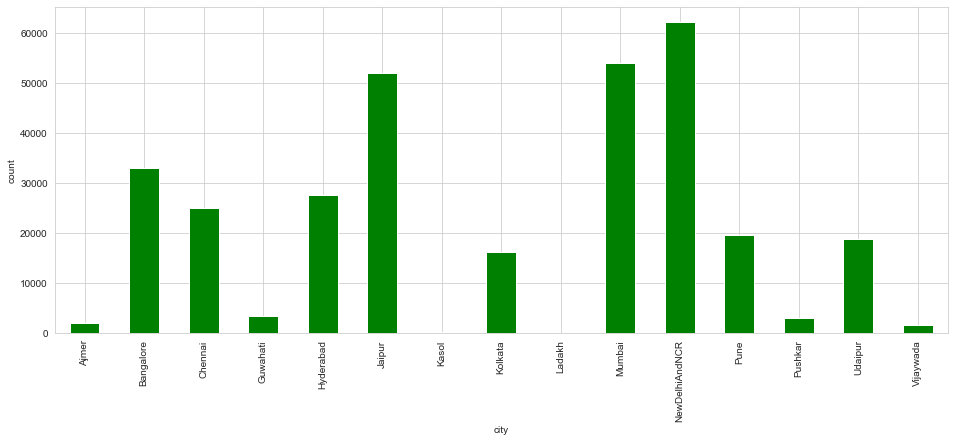

In [108]:
plt.figure(figsize=(16, 6))
newdf_1.groupby('city').sum()["mmt_tripadvisor_count"].plot.bar(color = 'green')
plt.ylabel('count')

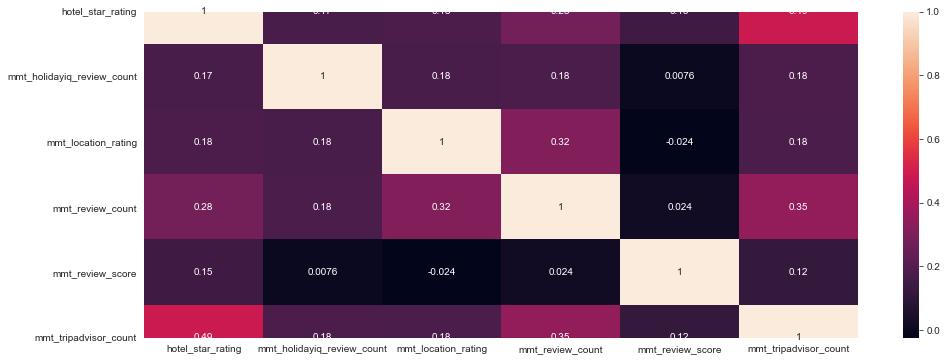

In [109]:
plt.figure(figsize=(16, 6))
corr = newdf_1.corr()
sns.heatmap(corr, annot=True)

In [110]:
#Pearson Coefficent Of Corellation between Variable 
pearsoncorr = newdf_1.corr(method='pearson')
pearsoncorr

,hotel_star_rating,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_score,mmt_tripadvisor_count
hotel_star_rating,1.000000,0.174421,0.182602,0.278085,0.145827,0.486414
mmt_holidayiq_review_count,0.174421,1.000000,0.175769,0.179201,0.007574,0.182554
mmt_location_rating,0.182602,0.175769,1.000000,0.315315,-0.023964,0.177928
mmt_review_count,0.278085,0.179201,0.315315,1.000000,0.023571,0.354120
mmt_review_score,0.145827,0.007574,-0.023964,0.023571,1.000000,0.119291
mmt_tripadvisor_count,0.486414,0.182554,0.177928,0.354120,0.119291,1.000000


In [111]:
from scipy.stats import chisquare

newdf_1=newdf_1.apply(lambda x : pd.factorize(x)[0])+1

pd.DataFrame([chisquare(newdf_1[x].values,f_exp=newdf_1.values.T,axis=1)[0] for x in newdf_1])



C:\Users\utsav\New folder\lib\site-packages\scipy\stats\stats.py:5048: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\utsav\New folder\lib\site-packages\scipy\stats\stats.py:5048: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\utsav\New folder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\utsav\New folder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\utsav\New folder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000e+00,3.037331e+06,5.867495e+06,2.003638e+05,1.767101e+06,3.455720e+05,3.001025e+05,1.978326e+05,3.140165e+05,9.965150e+05,1.059875e+05,8.229025e+05,2.430850e+05,8.943157e+06,8.945764e+06,7.589492e+06,inf,1.333530e+06,inf,1.111730e+07
1,8.226312e+08,0.000000e+00,1.395932e+07,2.679916e+09,4.864489e+08,4.085634e+09,2.969863e+09,1.451660e+09,2.025531e+09,1.815078e+09,1.192871e+09,1.494242e+09,3.030980e+08,5.218385e+06,5.242125e+06,5.418669e+06,inf,3.302160e+08,inf,6.842390e+06
2,2.189108e+09,4.676772e+09,0.000000e+00,7.546451e+09,5.144557e+09,1.181746e+10,9.923902e+09,7.030407e+09,8.015815e+09,7.592197e+09,3.601421e+09,7.011506e+09,9.094691e+08,2.480255e+06,3.607489e+06,5.578604e+06,inf,4.981255e+09,inf,3.499930e+06
3,2.642329e+04,2.912964e+06,5.928063e+06,0.000000e+00,1.630323e+06,1.019100e+04,3.063344e+04,1.020378e+04,6.728275e+04,7.594470e+05,2.925666e+04,6.121181e+05,2.749168e+05,9.005305e+06,9.007925e+06,7.651538e+06,inf,1.210778e+06,inf,1.117952e+07
4,3.366336e+08,1.108524e+07,5.148120e+06,1.025755e+09,0.000000e+00,1.663511e+09,1.151269e+09,5.381884e+08,6.509045e+08,5.597097e+08,4.260710e+08,4.298390e+08,1.130658e+08,6.541443e+06,6.604442e+06,5.975292e+06,inf,9.913803e+07,inf,8.543980e+06
5,3.171281e+04,2.915061e+06,5.936744e+06,2.981617e+03,1.631583e+06,0.000000e+00,2.506218e+04,9.220784e+03,6.587431e+04,7.586237e+05,3.281668e+04,6.117715e+05,2.827569e+05,9.014013e+06,9.016633e+06,7.660238e+06,inf,1.212575e+06,inf,1.118823e+07
6,2.718092e+05,2.893413e+06,5.887846e+06,6.165057e+05,1.693087e+06,1.308266e+06,0.000000e+00,2.546625e+05,2.884258e+05,9.237903e+05,3.408658e+05,6.252011e+05,2.829980e+05,8.964052e+06,8.966626e+06,7.610736e+06,inf,1.210009e+06,inf,1.113797e+07
7,3.059132e+04,2.895058e+06,5.914593e+06,3.575452e+04,1.617782e+06,7.255650e+04,5.759904e+04,0.000000e+00,5.921232e+04,7.438446e+05,2.817370e+04,5.959060e+05,2.661840e+05,8.991721e+06,8.994350e+06,7.637992e+06,inf,1.195266e+06,inf,1.116593e+07
8,1.107861e+06,2.797375e+06,5.808669e+06,2.682888e+06,1.829059e+06,5.937180e+06,4.042006e+06,1.174151e+06,0.000000e+00,6.366276e+05,1.093842e+06,4.997238e+05,2.862206e+05,8.884057e+06,8.886980e+06,7.533460e+06,inf,1.224998e+06,inf,1.105726e+07
9,1.141892e+08,5.243558e+06,4.966773e+06,2.740768e+08,2.895128e+07,5.234639e+08,3.369134e+08,1.069729e+08,2.555511e+07,0.000000e+00,9.622407e+07,5.755835e+06,2.176574e+07,7.802359e+06,7.836674e+06,6.739601e+06,inf,1.715937e+07,inf,9.868369e+06


 ### We can use ANOVA to find corellation between categorical and contionous variable

In [112]:
#vec = CountVectorizer(stop_words = "english",ngram_range=(3, 3))
#vec.fit(newdf_1["hotel_overview"])

#bag_of_words  =vec.transform(newdf_1["hotel_overview"])
#print(bag_of_words)

new_df[new_df["hotel_overview"].isnull()]
newdf_1["hotel_overview"] = newdf_1["hotel_overview"].replace(np.nan, "No overview ")
newdf_1["hotel_overview"].isnull().sum()

0

In [115]:
""" Hotel Overview """
newdf_1["hotel_overview"]

0           1
1           2
2           3
3           4
4           5
         ... 
19962    3223
19963    3224
19965    3225
19977    3226
19988      35
Name: hotel_overview, Length: 4732, dtype: int64

In [ ]:
newdf_1["hotel_overview"].astype(str)